## Copy first 1000 cases for training

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define paths
dataset_path = 'E:/rsna-intracranial-hemorrhage-detection'
destination_dir = './rsna-mil-training'
train_images_dir = 'E:/rsna-intracranial-hemorrhage-detection/stage_2_train'
scan_level_dataset = 'C:/Users/MINH/Downloads/Coding/HCMUS/Thesis/Brain-Stroke-Diagnosis/rsna/scan_level_dataset.csv'
filename = "C:/Users/MINH/OneDrive - nhatminhtrieu1/Thesis 2025 Storage/RSNA_Datasheet/sorted_training_dataset_with_labels.csv"

# Create destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

In [3]:
# Read file csv as a dataframe
raw_df = pd.read_csv(filename)

raw_df.head()

,filename,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,patient_id,study_instance_uid,series_instance_uid,image_position,samples_per_pixel,pixel_spacing,pixel_representation,window_center,window_width,rescale_intercept,rescale_slope,ID
0,ID_45785016b.dcm,0,0,0,0,0,0,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,"[-125.000, -122.596, 35.968]",1,"[0.488281, 0.488281]",1,30,80,-1024.0,1.0,45785016b
1,ID_37f32aed2.dcm,0,0,0,0,0,0,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,"[-125.000, -122.596, 38.484]",1,"[0.488281, 0.488281]",1,30,80,-1024.0,1.0,37f32aed2
2,ID_1b9de2922.dcm,0,0,0,0,0,0,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,"[-125.000, -122.596, 41.000]",1,"[0.488281, 0.488281]",1,30,80,-1024.0,1.0,1b9de2922
3,ID_d61a6a7b9.dcm,0,0,0,0,0,0,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,"[-125.000, -122.596, 43.517]",1,"[0.488281, 0.488281]",1,30,80,-1024.0,1.0,d61a6a7b9
4,ID_406c82112.dcm,0,0,0,0,0,0,ID_0002cd41,ID_66929e09d4,ID_e22a5534e6,"[-125.000, -122.596, 46.033]",1,"[0.488281, 0.488281]",1,30,80,-1024.0,1.0,406c82112


In [4]:
# Read scan_level_dataset.csv as a DataFrame 
scan_level_df = pd.read_csv(scan_level_dataset)

In [5]:
# Extract the first 1000 rows
scan_subset = scan_level_df.head(1000)

# Get patient_id and study_instance_uid
patient_ids = scan_subset['patient_id']
study_uids = scan_subset['study_instance_uid']

In [6]:
# Save scan_subset to a new csv file
scan_subset.to_csv('training_1000_scan_subset.csv', index=False)

In [7]:
# Initialize a list to hold filenames
filenames_to_copy = []

# Iterate through the extracted patient IDs and study UIDs
for patient_id, study_uid in zip(patient_ids, study_uids):
    matching_files = raw_df[(raw_df['patient_id'] == patient_id) & 
                            (raw_df['study_instance_uid'] == study_uid)]
    # Append the filenames to the list
    filenames_to_copy.extend(matching_files['filename'].tolist())

In [8]:
for index, row in scan_subset.iterrows():
    patient_id = row['patient_id']
    study_instance_uid = row['study_instance_uid']
    
    # Remove 'ID_' prefix from patient_id and study_instance_uid
    patient_id_clean = patient_id.replace('ID_', '')
    study_instance_uid_clean = study_instance_uid.replace('ID_', '')
    
    # Create the subdirectory name without the 'ID_' prefix
    subdirectory_name = f"{patient_id_clean}_{study_instance_uid_clean}"
    subdirectory_path = os.path.join(destination_dir, subdirectory_name)
    os.makedirs(subdirectory_path, exist_ok=True)
    
    # Filter raw_df for matching patient_id and study_instance_uid
    matching_files = raw_df[(raw_df['patient_id'] == patient_id) & 
                             (raw_df['study_instance_uid'] == study_instance_uid)]
    
    # Copy each matching file to the subdirectory
    for _, file_row in matching_files.iterrows():
        # Assuming there's a column that contains the filename or image identifier
        # Replace 'image_id' with the correct column name
        filename = str(file_row.get('image_id', file_row.get('filename', '')))   # Assuming DICOM files
        source_file_path = os.path.join(train_images_dir, filename)
        
        if os.path.exists(source_file_path):
            destination_file_path = os.path.join(subdirectory_path, filename)
            # Copy the file
            with open(source_file_path, 'rb') as source_file:
                with open(destination_file_path, 'wb') as dest_file:
                    dest_file.write(source_file.read())
        else:
            print(f"File {source_file_path} not found.")

C:\Users\MINH\AppData\Local\Temp\ipykernel_20092\2375971342.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scan_subset['other'] = scan_subset.apply(lambda row: 1 if row[['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].sum() == 0 else 0, axis=1)


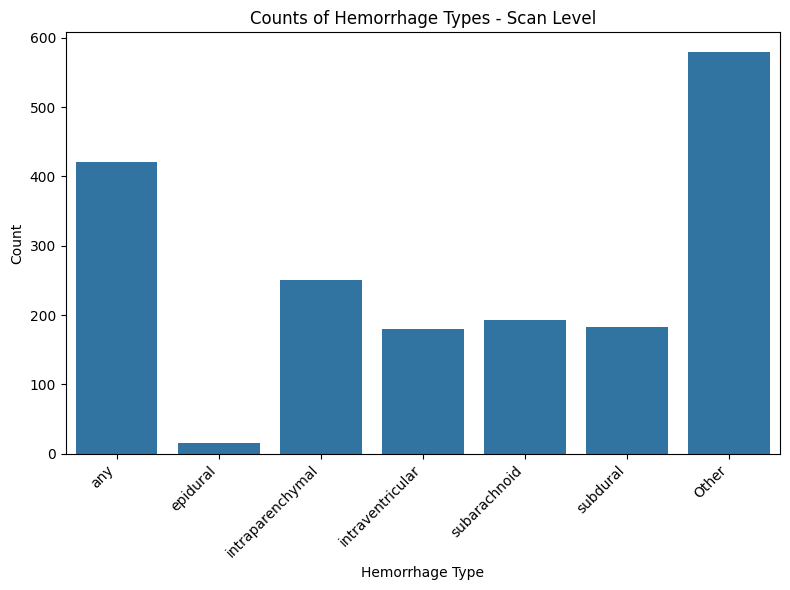

In [9]:
# Step 1: Count occurrences of each hemorrhage type
hemorrhage_counts = scan_subset[['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].sum()

# Step 2: Count occurrences of patient labels not in the specified hemorrhage types
# Create a new column for other patient labels
scan_subset['other'] = scan_subset.apply(lambda row: 1 if row[['any', 'epidural', 'intraparenchymal', 'intraventricular', 'subarachnoid', 'subdural']].sum() == 0 else 0, axis=1)
other_count = scan_subset['other'].sum()

# Step 3: Convert the Series to a DataFrame for plotting
hemorrhage_counts = hemorrhage_counts.reset_index()
hemorrhage_counts.columns = ['hemorrhage_type', 'count']

# Create a DataFrame for the 'Other' category
other_df = pd.DataFrame({'hemorrhage_type': ['Other'], 'count': [other_count]})

# Use pd.concat to add the 'Other' counts to the hemorrhage_counts DataFrame
hemorrhage_counts = pd.concat([hemorrhage_counts, other_df], ignore_index=True)

# Step 4: Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='hemorrhage_type', y='count', data=hemorrhage_counts)
plt.title('Counts of Hemorrhage Types - Scan Level')
plt.xlabel('Hemorrhage Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Count the number of patient who have no hemorrhage types, means that all labels are 0
no_hemorrhage = scan_subset[(scan_subset['any'] == 0) & 
                            (scan_subset['epidural'] == 0) & 
                            (scan_subset['intraparenchymal'] == 0) & 
                            (scan_subset['intraventricular'] == 0) & 
                            (scan_subset['subarachnoid'] == 0) & 
                            (scan_subset['subdural'] == 0)]

# Display the number of patients with no hemorrhage
print('Number of patients with no hemorrhage:', len(no_hemorrhage))

Number of patients with no hemorrhage: 579
